# Анализ рынка заведений общественного питания Москвы

# Задача:

* Провети анализ текущего положения дел на рынке заведений общественного питания
* На основании проведенного анализа предложить вариант который с большей вероятностью будет пользоваться на рынке популярностью. Так же определить основные районы города минимальным уровнем конкуренции и относительно большим потоком людей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-данных-и-их-предобработка" data-toc-modified-id="Импорт-данных-и-их-предобработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт данных и их предобработка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-данных" data-toc-modified-id="Импорт-библиотек-и-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-соотношения-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Анализ-соотношения-видов-объектов-общественного-питания-по-количеству-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ соотношения видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Cоотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Cоотношение-сетевых-и-несетевых-заведений-по-количеству-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cоотношение сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Анализ-видов-общественного-питания-в-зависимости-от-его-типа" data-toc-modified-id="Анализ-видов-общественного-питания-в-зависимости-от-его-типа-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ видов общественного питания в зависимости от его типа</a></span></li><li><span><a href="#Анализ-числа-посадочных-мест-в-сетевых-заведениях" data-toc-modified-id="Анализ-числа-посадочных-мест-в-сетевых-заведениях-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ числа посадочных мест в сетевых заведениях</a></span></li><li><span><a href="#Анализ-среднего-количества-мест-в-зависимости-от-вида-общественного-питания" data-toc-modified-id="Анализ-среднего-количества-мест-в-зависимости-от-вида-общественного-питания-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ среднего количества мест в зависимости от вида общественного питания</a></span></li><li><span><a href="#Анализ-объектов-общественного-питания-относительно-улиц-на-которых-они-расположены" data-toc-modified-id="Анализ-объектов-общественного-питания-относительно-улиц-на-которых-они-расположены-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Анализ объектов общественного питания относительно улиц на которых они расположены</a></span></li><li><span><a href="#Анализ-улиц-с-одним-объектом-общественного-питания" data-toc-modified-id="Анализ-улиц-с-одним-объектом-общественного-питания-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Анализ улиц с одним объектом общественного питания</a></span></li><li><span><a href="#Анализ--распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания" data-toc-modified-id="Анализ--распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Анализ  распределение количества посадочных мест для улиц с большим количеством объектов общественного питания</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Импорт данных и их предобработка

### Импорт библиотек и данных

In [2]:
import pandas as pd
import numpy as np
import math 
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import random
from datetime import datetime, timedelta
pd.set_option('display.max_columns', 40)

In [3]:
import plotly.graph_objects as go

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# импортируем данные мосгаза по улицам Москвы и к каким округам и районам они относятся
from io import BytesIO
import requests
spreadsheet_id = '1NtouYT9WCb8n0I9bgITyN-TDsNmYis5jepi7Y756tOA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mosgaz_streets = pd.read_csv(BytesIO(r.content))
mosgaz_streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [6]:
# иморит основной базы по заведениям общепита
path = "F:\\datasets\\History_from_data\\"
try:
    restaurant = pd.read_csv(path + 'rest_data.csv') 
except:
    restaurant = pd.read_csv('/datasets/rest_data.csv')

In [7]:
restaurant

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [8]:
restaurant.address.value_counts()

город Москва, Ходынский бульвар, дом 4                       95
город Москва, Пресненская набережная, дом 2                  63
город Москва, проспект Мира, дом 211, корпус 2               60
город Москва, Кировоградская улица, дом 13А                  53
город Москва, площадь Киевского Вокзала, дом 2               48
                                                             ..
город Москва, 7-я Кожуховская улица, дом 13/4                 1
город Москва, Садовая-Самотёчная улица, дом 6, строение 1     1
город Москва, улица Земляной Вал, дом 32                      1
город Москва, Садовническая улица, дом 20, строение 1         1
город Москва, 9-я Северная линия, дом 1                       1
Name: address, Length: 9108, dtype: int64

In [9]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


* `id` - индификатор объекта
* `object_name` - название объекта общественного питания
* `chain` - сетевой ресторан
* `object_type` - тип объекта общественного питания
* `address` - адресс
* `number` - количество посадочных мест

Пропусков в колонках нет

In [10]:
# переименовал значения
chain = {'нет' : 'Не сеть', 'да': 'Сеть'}
restaurant['chain'].replace(chain, inplace=True)

In [11]:

chain = {'нет': 'Не сеть', 'да': 'Сеть'}
restaurant['chain'].replace(chain, inplace=True)
restaurant

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,Не сеть,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,Не сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,Не сеть,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,Сеть,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,Не сеть,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,Сеть,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,Сеть,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,Сеть,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,Сеть,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [12]:
restaurant[restaurant['chain'] == 'Сеть']['object_name'].value_counts().head(20)

KFC                155
Шоколадница        141
Бургер Кинг        122
Макдоналдс         122
Домино'с Пицца      86
Теремок             84
Крошка Картошка     82
Милти               65
Суши Wok            61
Папа Джонс          50
Кофе с собой        44
Чайхона №1          42
Хинкальная          35
Якитория            33
Кофе Хаус           31
Додо Пицца          31
Starbucks           30
МАКДОНАЛДС          29
Subway              29
Тануки              26
Name: object_name, dtype: int64

In [13]:
len(restaurant[restaurant['chain'] == 'Сеть']['object_name'].unique())

724

Так как среди названий сетевых заведений общественного питания есть одни и те же заведения запизаные с использование слов в разных регистрах приведем все их названия к нижнему регистру а самые крупные сети приведем к единому названию в кононке

In [14]:
def pattern_name(row):
    if 'kfc' in row:
        return 'kfc'
    if 'макдоналдс' in row:
        return 'макдоналдс'
    if 'mcdonalds' in row:
        return 'макдоналдс'
    if 'теремок' in row:
        return 'теремок'
    if 'сабвей' in row:
        return 'сабвей'
    if 'subway' in row:
        return 'сабвей'
    if 'папа джонс' in row:
        return 'папа джонс'
    if 'крошка картошка' in row:
        return 'крошка картошка'
    if 'бургер кинг' in row:
        return 'бургер кинг'
    if 'шоколадница' in row:
        return 'шоколадница'
    if 'милти' in row:
        return 'милти'
    if 'суши вок' in row:
        return 'суши wok'
    if 'старбакс' in row:
        return 'starbucks'
    if 'му-му' in row:
        return 'му-му'
    if 'пицца хат' in row:
        return 'пицца хат'
    if 'кофе-хаус' in row:
        return 'кофе хаус'
    if 'домино"с' in row:
        return 'домино"с пицца'
    else:
        return row
    
restaurant['object_name'] = restaurant['object_name'].map(lambda x : x.lower())
restaurant['object_name'] = restaurant['object_name'].apply(pattern_name)

In [15]:
len(restaurant[restaurant['chain'] == 'Сеть']['object_name'].unique())

499

In [16]:
restaurant['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Всего 9 никальных типов заведений в базе. Среди них нет скрытых дубликатов все типы написаны корректно.

In [17]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [18]:
restaurant.duplicated(subset=['object_name', 'chain', 'object_type', 'address']).sum()

191

In [19]:
restaurant.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address'], keep='first', ignore_index=True, inplace=False)

,id,object_name,chain,object_type,address,number
0,151635,сметана,Не сеть,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,Не сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,Не сеть,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,Сеть,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,Не сеть,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15170,222077,шоколадница,Сеть,кафе,"город Москва, Кантемировская улица, дом 47",72
15171,219759,шоколадница,Сеть,кафе,"город Москва, улица Вавилова, дом 3",36
15172,208537,шоколадница,Сеть,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15173,209264,шоколадница,Сеть,кафе,"город Москва, улица Земляной Вал, дом 33",10


## Анализ данных

### Анализ соотношения видов объектов общественного питания по количеству

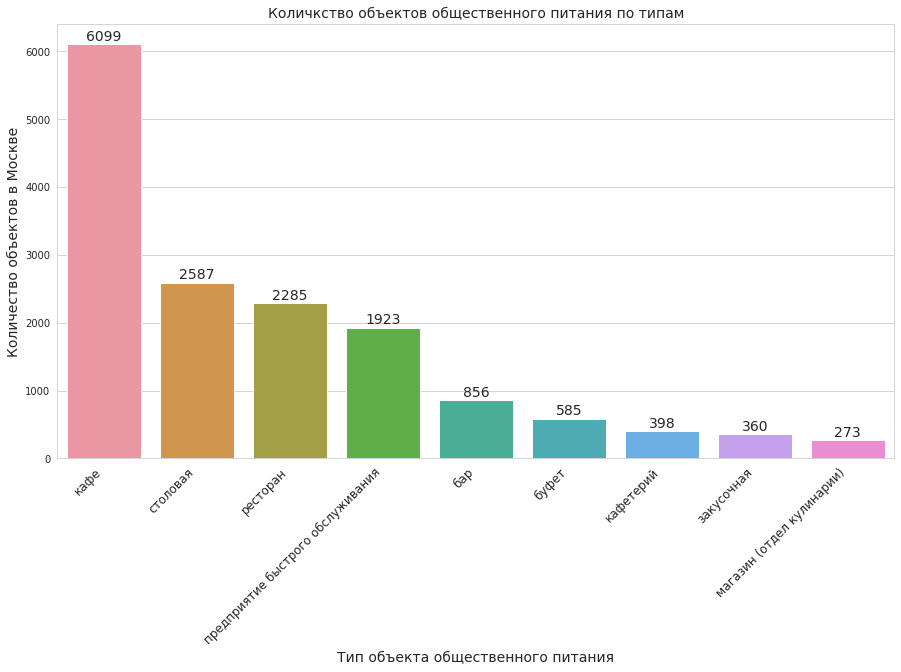

In [20]:
plt.style.use('seaborn-pastel')
# color='#781D42'
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid') 
ax = sns.countplot(x="object_type", data=restaurant, order=restaurant.object_type.value_counts().index)
for container in ax.containers:
    ax.bar_label(container, padding=1, fontsize=14)
#ax.bar_label(ax.containers[0])
plt.title('Количкство объектов общественного питания по типам', fontsize=14)
plt.ylabel('Количество объектов в Москве', fontsize=14)
plt.xlabel('Тип объекта общественного питания', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45
                  , horizontalalignment= 'right', fontsize= 12)
plt.show()

In [1]:
data = restaurant.groupby(by=['object_type']).agg({'id': 'count'}).sort_values('id', ascending=False).reset_index()
fig = go.Figure(data=[go.Pie(values=data['id'], labels=data['object_type'], title='Cоотношение видов объектов общественного питания по количеству')])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=12)
fig

NameError: name 'restaurant' is not defined

Объектов общественного питания по типу `кафе` значительно больше остальных на рынке Москвы. Три последующих типа имеют в сумме примероно столько же объектов.

In [22]:
data = restaurant.groupby(by=['object_type']).agg({'number': 'median'}).sort_values('number', ascending=False).reset_index()
fig = go.Figure(data=[go.Pie(values=data['number'], labels=data['object_type'], title='Cоотношение видов объектов общественного питания по среднему количеству мест')])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent+value', textfont_size=12)
fig

Из всех видов общественного питания `кафе` имеет большее представительство на рынке общественного питания г Москвы. Данный вид знанимает почти 40% от общего числа. Так же следует отметить `столовые` `рестораны` и `предприятия быстрого обслуживания` с 16.8, 14.9 и 12.5 процентов занимает существенную долю сферы общепита.

По анализу средней вместимости по видам можно сказать что по посадачным местам для посетителей лидирует `столовые` с показателем 103  далее идут `рестораны` с медианым значением на 80 первсон `бары` - 35 и `буфеты` - 32. `Кафе` - которыей является лидером по количеству точек занимает лишь 4 место с вместимостью 30 человек.

### Cоотношение сетевых и несетевых заведений по количеству

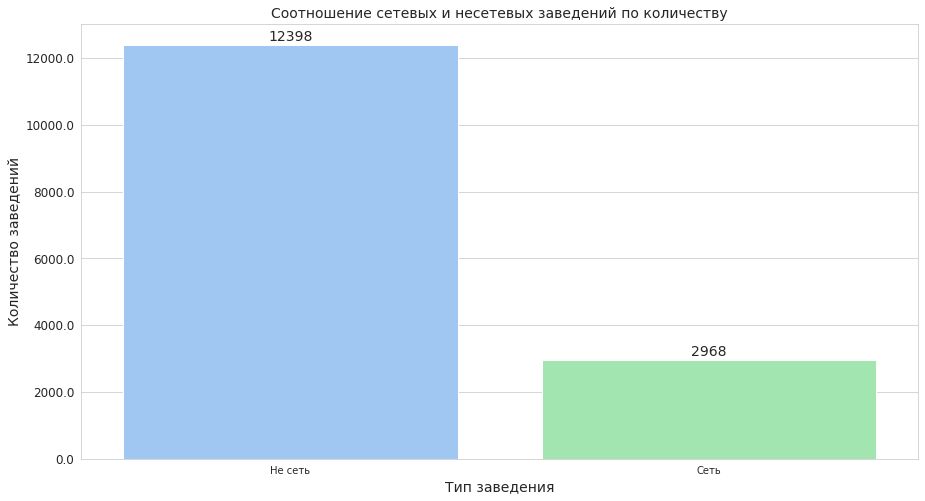

In [23]:
data_group = (restaurant.groupby('chain')
                        . agg({'id': 'count'}).reset_index().sort_values(by='id', ascending=False)
             )
plt.figure(figsize=(15, 8))
ax= sns.barplot(x='chain',
                y= 'id',
                data= data_group)
for container in ax.containers:
    ax.bar_label(container, padding=1, fontsize=14)
# ax.barplot(ax.conteiner[0])    
plt.title('Соотношение сетевых и несетевых заведений по количеству', fontsize=14)
plt.xlabel('Тип заведения', fontsize=14)
plt.ylabel('Количество заведений', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), size = 12)
plt.show()

Можно заметить что количесто не сетевых заведений общественного питания в 4 раза больше чем сетевых 

### Анализ видов общественного питания в зависимости от его типа

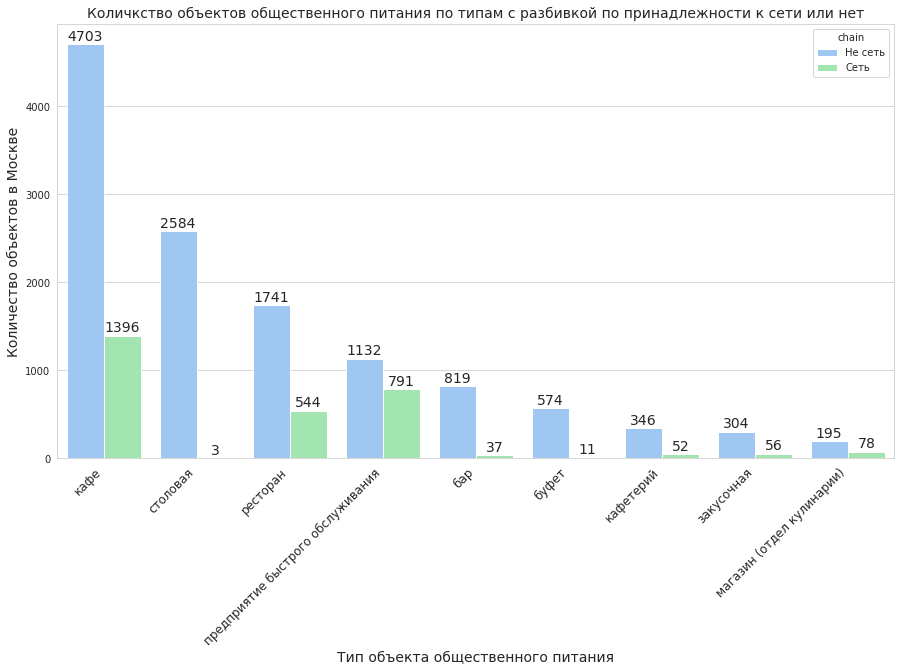

In [24]:
plt.style.use('seaborn-pastel')
# color='#781D42'
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid') 
ax = sns.countplot(x="object_type", hue='chain', data=restaurant, order=restaurant.object_type.value_counts().index)
for container in ax.containers:
    ax.bar_label(container, padding=1, fontsize=14)
plt.title('Количкство объектов общественного питания по типам с разбивкой по принадлежности к сети или нет', fontsize=14)
plt.ylabel('Количество объектов в Москве', fontsize=14)
plt.xlabel('Тип объекта общественного питания', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45
                  , horizontalalignment= 'right', fontsize= 12)
plt.show()

In [25]:
data = restaurant.query('chain == "Сеть"').groupby(by=['object_type']).agg({'id': 'count'}).sort_values('id', ascending=False).reset_index()
fig = go.Figure(data=[go.Pie(values=data['id'], labels=data['object_type'], title='Cоотношение видов сетевых объектов общественного питания по количеству')])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent', textfont_size=12)
fig

Среди сетевых объектов общественного питания представленные в Москве являются `кафе`. Педприятия быстрого обслуживания занимают вторую строчку в рейтенге. Далее следует рестораны.

### Анализ числа посадочных мест в сетевых заведениях

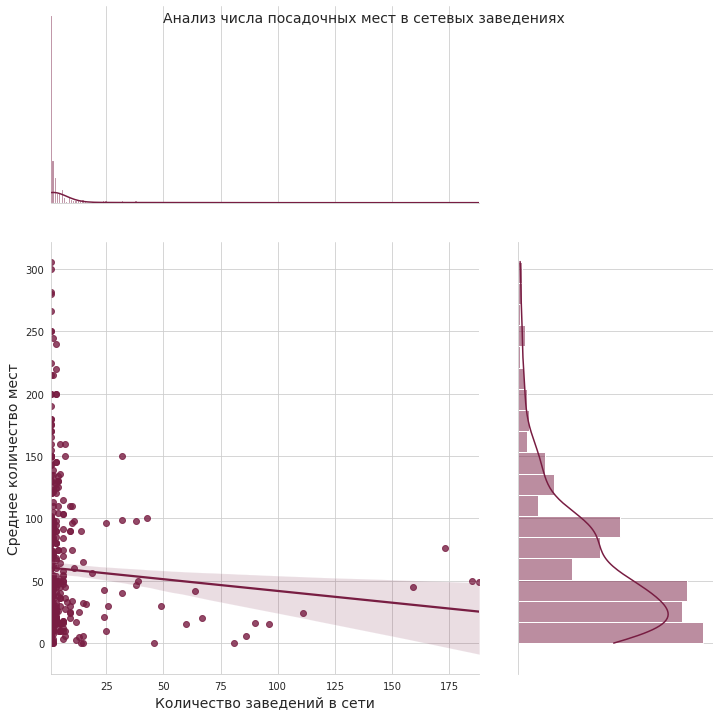

In [26]:
chain_numbers = restaurant.query('chain == "Сеть"').groupby('object_name').agg({'id': 'count', 'number': 'median'}).reset_index().sort_values(by='id', ascending=False)
ax = sns.jointplot(data=chain_numbers, x='id', y='number', kind='reg', color='#781D42', height=10, ratio=2)
ax.fig.suptitle("Анализ числа посадочных мест в сетевых заведениях", fontsize=14)
ax.ax_joint.set_ylabel('Среднее количество мест', fontsize=14)
ax.ax_joint.set_xlabel('Количество заведений в сети', fontsize=14)
plt.show()

По диаграмме рассеяния можно сказать что на рынке преобладает небольшие сетевые заведения с большим количеством мест.

### Анализ среднего количества мест в зависимости от вида общественного питания

In [27]:
restaurant.groupby('object_type')['number'].describe().reset_index().sort_values(by='mean', ascending=False)

,object_type,count,mean,std,min,25%,50%,75%,max
8,столовая,2587.0,130.246618,95.179313,0.0,50.0,103.0,200.0,1400.0
7,ресторан,2285.0,96.834136,94.756542,0.0,46.0,80.0,114.0,1500.0
1,буфет,585.0,51.129915,56.331974,0.0,14.0,32.0,80.0,320.0
0,бар,856.0,43.494159,67.082876,0.0,20.0,35.0,50.0,1700.0
3,кафе,6099.0,39.716019,37.720947,0.0,15.0,30.0,50.0,533.0
6,предприятие быстрого обслуживания,1923.0,20.552262,38.366974,0.0,0.0,5.0,25.0,580.0
4,кафетерий,398.0,9.123116,14.639150,0.0,0.0,6.0,12.0,200.0
2,закусочная,360.0,7.608333,16.650912,0.0,0.0,0.0,10.0,216.0
5,магазин (отдел кулинарии),273.0,5.589744,9.872729,0.0,0.0,0.0,8.0,50.0


В среднем больше всего количество мест у обладают столовые. Так же по максимальным значениям можно сказать что в базе существуют недостоверные значения по этому параметру. Необходимо избавится от ывбросов для корректного отоборажения значений.

In [28]:
number_dict = {}
for a in restaurant['object_type'].unique():
    number_dict[a] = int(np.percentile(restaurant[restaurant['object_type']==a]['number'], [95]))
number_dict 

{'кафе': 100,
 'столовая': 289,
 'закусочная': 35,
 'предприятие быстрого обслуживания': 92,
 'ресторан': 250,
 'кафетерий': 30,
 'буфет': 177,
 'бар': 102,
 'магазин (отдел кулинарии)': 28}

In [29]:
filtred_number_restauran = restaurant.query('(object_type == "бар" and number < 102)\
or (object_type == "буфет" and number < 177)\
or (object_type == "магазин (отдел кулинарии)" and number < 28)\
or (object_type == "кафетерий" and number < 30)\
or (object_type == "ресторан" and number < 250)\
or (object_type == "предприятие быстрого обслуживания" and number < 92)\
or (object_type == "закусочная" and number < 35)\
or (object_type == "столовая" and number < 289)\
or (object_type == "кафэ" and number < 100)')

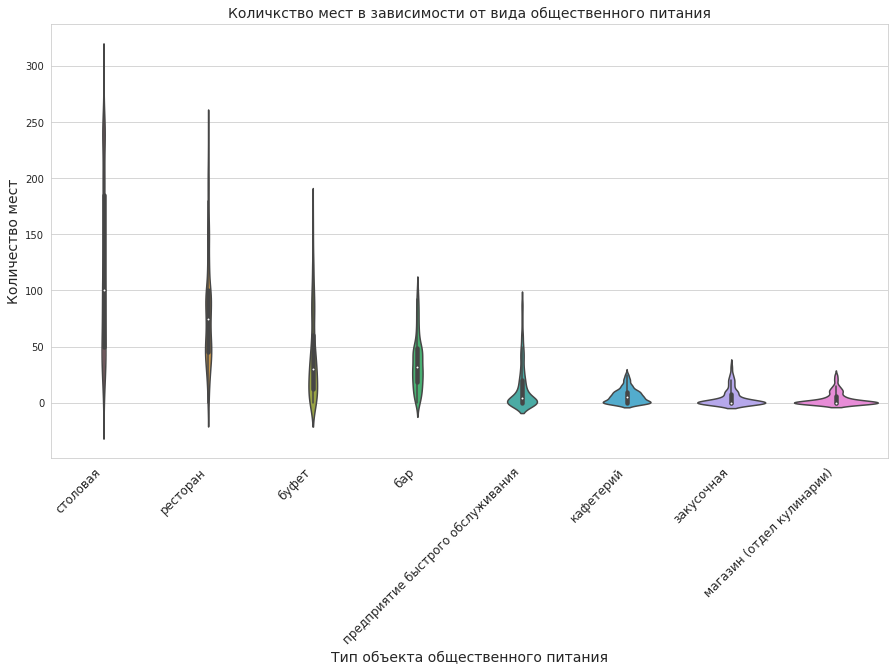

In [30]:
plt.figure(figsize=(15, 8))
my_order = filtred_number_restauran.groupby('object_type')['number'].mean().sort_values().iloc[::-1].index
ax = sns.violinplot(data=filtred_number_restauran , x='object_type', y='number', order= my_order)
plt.title('Количкство мест в зависимости от вида общественного питания', fontsize=14)
plt.ylabel('Количество мест', fontsize=14)
plt.xlabel('Тип объекта общественного питания', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45
                  , horizontalalignment= 'right', fontsize= 12)
plt.show()

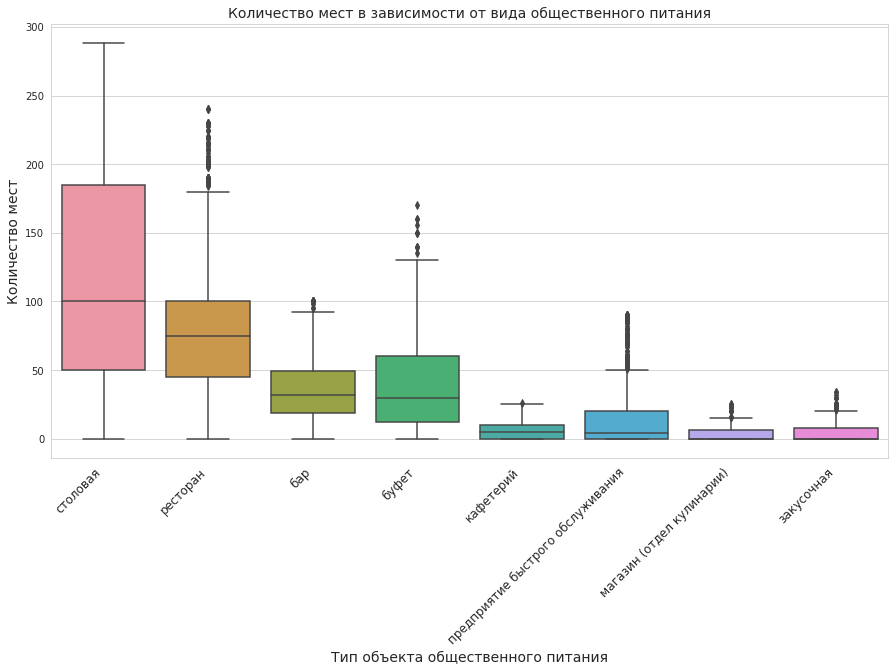

In [31]:
plt.figure(figsize=(15, 8))
my_order = filtred_number_restauran.groupby('object_type')['number'].median().sort_values().iloc[::-1].index
ax = sns.boxplot(data=filtred_number_restauran , x='object_type', y='number', order= my_order)
plt.title('Количество мест в зависимости от вида общественного питания', fontsize=14)
plt.ylabel('Количество мест', fontsize=14)
plt.xlabel('Тип объекта общественного питания', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45
                  , horizontalalignment= 'right', fontsize= 12)
plt.show()

In [32]:
subset_columns = ['mean', '50%', 'max']
filtred_number_restauran.groupby('object_type')['number'].\
describe().reset_index().sort_values(by='50%', ascending=False).\
style.highlight_max(color='#6EBF8B', subset=subset_columns).highlight_min(color='#D885A3', subset=subset_columns)

,object_type,count,mean,std,min,25%,50%,75%,max
7,столовая,2457.000000,118.770859,75.979542,0.000000,50.000000,100.000000,185.000000,288.000000
6,ресторан,2166.000000,80.935826,48.848865,0.000000,45.000000,75.000000,100.000000,240.000000
0,бар,812.000000,35.709360,23.727684,0.000000,18.750000,32.000000,49.000000,100.000000
1,буфет,555.000000,41.342342,37.375134,0.000000,12.000000,30.000000,60.000000,170.000000
3,кафетерий,371.000000,6.401617,6.479731,0.000000,0.000000,5.000000,10.000000,26.000000
5,предприятие быстрого обслуживания,1825.000000,14.056438,20.395395,0.000000,0.000000,4.000000,20.000000,90.000000
2,закусочная,339.000000,4.696165,7.529764,0.000000,0.000000,0.000000,8.000000,34.000000
4,магазин (отдел кулинарии),257.000000,3.626459,5.826308,0.000000,0.000000,0.000000,6.000000,25.000000


В среднем самое большое количество мест наблюдается в столовых. Далее следуют рестораны  и бары. Буфеты находятся на 4 строчке.

###  Анализ объектов общественного питания относительно улиц на которых они расположены

In [33]:
# создздание колонки с улицей (используем таблицу с улицами и районом)
def street_funct(row):
    row_split = row.split(',')
    for i in row_split:
        i = i.strip()
        if i in streets_sets:
            return i       
    return 'unknown'

streets_sets = set(mosgaz_streets['streetname'].unique())
restaurant['street'] = restaurant['address'].apply(street_funct)

In [34]:
restaurant

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,Не сеть,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,Не сеть,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,Не сеть,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,Сеть,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,Не сеть,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,Сеть,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,Сеть,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,Сеть,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,Сеть,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


In [35]:
s = len(restaurant.query('street == "unknown"'))
print(f"Количество улиц названий которых нет в базе мосгаза состовляет {s}.")

Количество улиц названий которых нет в базе мосгаза состовляет 613.


In [36]:
# топ-10 улиц по количеству объектов общественного питания
top_streets = restaurant.query('(street != "unknown") and (street != "город Зеленоград")').groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index().head(10)
top_streets

,street,id
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,165
5,Ленинский проспект,148
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


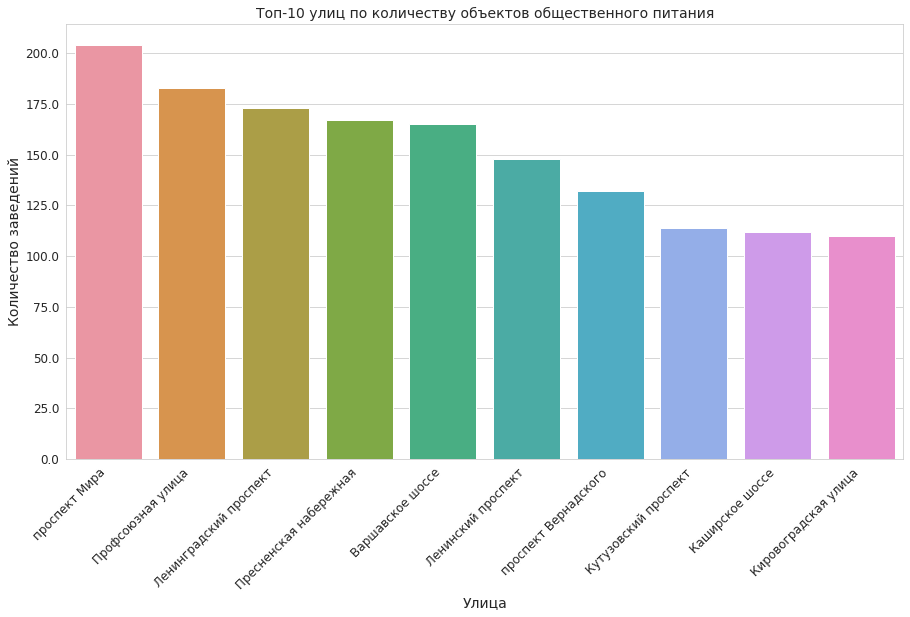

In [37]:
plt.figure(figsize=(15, 8))
ax= sns.barplot(x='street',
                y= 'id',
                data= top_streets)
#for container in ax.containers:
#    ax.bar_label(container, padding=1, fontsize=14)
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=14)
plt.xlabel('Улица', fontsize=14)
plt.ylabel('Количество заведений', fontsize=14)
ax.set_yticklabels(ax.get_yticks(), size = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45
                  , horizontalalignment= 'right', fontsize= 12)
plt.show()

In [38]:
top_streets = top_streets.merge(mosgaz_streets, how='left', left_on='street', right_on='streetname')
top_streets = top_streets.drop(columns='streetname')
top_area = top_streets.groupby('street').agg({'areaid': 'first', 'okrug': 'first', 'area': ' ,'.join, 'id': 'first'}).rename(columns={'id': 'object_amount'})
pd.set_option("display.max_colwidth", None)
display(top_area.reset_index().sort_values(by='object_amount', ascending= False))

,street,areaid,okrug,area,object_amount
9,проспект Мира,70,СВАО,"Алексеевский район ,Ярославский Район ,Район Марьина роща ,Останкинский район ,Район Ростокино ,Район Свиблово ,Мещанский район",204
7,Профсоюзная улица,123,ЮЗАО,"Академический район ,Район Черемушки ,Район Ясенево ,Район Коньково ,Обручевский район ,Район Теплый Стан",183
4,Ленинградский проспект,54,САО,"Район Аэропорт ,Район Беговой ,Хорошевский район ,Район Сокол",173
6,Пресненская набережная,17,ЦАО,Пресненский район,167
0,Варшавское шоссе,109,ЮАО,"Район Чертаново Центральное ,Район Чертаново Северное ,Район Чертаново Южное ,Донской район ,Район Нагатино-Садовники ,Нагорный район ,Район Северное Бутово ,Район Южное Бутово",165
5,Ленинский проспект,44,ЗАО,"Район Проспект Вернадского ,Район Тропарево-Никулино ,Донской район ,Район Гагаринский ,Ломоносовский район ,Обручевский район ,Район Теплый Стан ,Район Якиманка",148
8,проспект Вернадского,44,ЗАО,"Район Проспект Вернадского ,Район Раменки ,Район Тропарево-Никулино ,Район Гагаринский ,Ломоносовский район",132
3,Кутузовский проспект,38,ЗАО,"Район Дорогомилово ,Район Фили-Давыдково",114
1,Каширское шоссе,101,ЮАО,"Район Москворечье-Сабурово ,Район Нагатино-Садовники ,Район Орехово-Борисово Южное ,Район Орехово-Борисово Северное",112
2,Кировоградская улица,109,ЮАО,"Район Чертаново Центральное ,Район Чертаново Северное ,Район Чертаново Южное",110


Больше всего объектов общественного питания представлено на проспекте мира который относится сразу к 7 района города Москвы. Далее по количеству следуеет Профсоюзная которая относится срязу к 6 районам.

### Анализ улиц с одним объектом общественного питания

In [39]:
# количество улиц на которых находится только один объект общественного питания
one_street = restaurant.query('(street != "unknown") and (street != "город Зеленоград")').groupby('street').agg({'id':'count', }).sort_values(by='id', ascending=False).reset_index()
one_street = one_street.query('id == 1')
print(f"Общее количество улиц на которых находится только один объект общественного питания состовляет {len(one_street)}.")

Общее количество улиц на которых находится только один объект общественного питания состовляет 518.


In [40]:
one_street = one_street.merge(mosgaz_streets, how='left', left_on='street', right_on='streetname')
one_street = one_street.drop(columns='streetname')
one_street = one_street.groupby('street').agg({'areaid': 'first', 'okrug': 'first', 'area': 'first'})
one_street

,areaid,okrug,area
street,,,
1-й Балтийский переулок,54,САО,Район Аэропорт
1-й Басманный переулок,13,ЦАО,Басманный район
1-й Ботанический проезд,82,СВАО,Район Свиблово
1-й Вешняковский проезд,120,ЮВАО,Рязанский район
1-й Голутвинский переулок,21,ЦАО,Район Якиманка
...,...,...,...
улица Шеногина,92,СЗАО,Район Хорошево-Мневники
улица Шумилова,113,ЮВАО,Район Кузьминки
улица Шумкина,26,ВАО,Район Сокольники


In [41]:
# районы с улицами на которых не более одного объекта общественного питания
one_street['area'].unique()

array(['Район Аэропорт', 'Басманный район', 'Район Свиблово',
       'Рязанский район', 'Район Якиманка', 'Район Хамовники',
       'Район Соколиная Гора', 'Даниловский район',
       'Красносельский район', 'Таганский район', 'Район Лефортово',
       'Район Печатники', 'Район Сокольники', 'Район Замоскворечье',
       'Хорошевский район', 'Район Арбат', 'Алексеевский район',
       'Район Текстильщики', 'Район Ростокино', 'Район Раменки',
       'Район Хорошево-Мневники', 'Район Покровское-Стрешнево',
       'Район Марьина роща', 'Район Богородское', 'Нижегородский район',
       'Тверской район', 'Лосиноостровский район', 'Район Преображенское',
       'Район Ново-Переделкино', 'Район Измайлово',
       'Район Восточное Измайлово', 'Район Беговой', 'Донской район',
       'Район Гольяново', 'Войковский Район', 'Савеловский район',
       'Район Филевский Парк', 'Район Перово', 'Район Чертаново Южное',
       'Южнопортовый Район', 'Головинский район', 'Район Южное Бутово',
       'Ос

In [42]:
print(f"Общее количество районов с улицами на которых находится только один объект общественного питания состовляет {len(one_street['area'].unique())}.")

Общее количество районов с улицами на которых находится только один объект общественного питания состовляет 97.


### Анализ  распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

In [43]:
# отфильтруем от выбросов по местам
filtred_number_restauran = restaurant.query('(object_type == "бар" and number < 102)\
or (object_type == "буфет" and number < 177)\
or (object_type == "магазин (отдел кулинарии)" and number < 28)\
or (object_type == "кафетерий" and number < 30)\
or (object_type == "ресторан" and number < 250)\
or (object_type == "предприятие быстрого обслуживания" and number < 92)\
or (object_type == "закусочная" and number < 35)\
or (object_type == "столовая" and number < 289)\
or (object_type == "кафэ" and number < 100)')

In [44]:
number_top_streets = filtred_number_restauran[filtred_number_restauran['street'].isin(top_streets.street)]

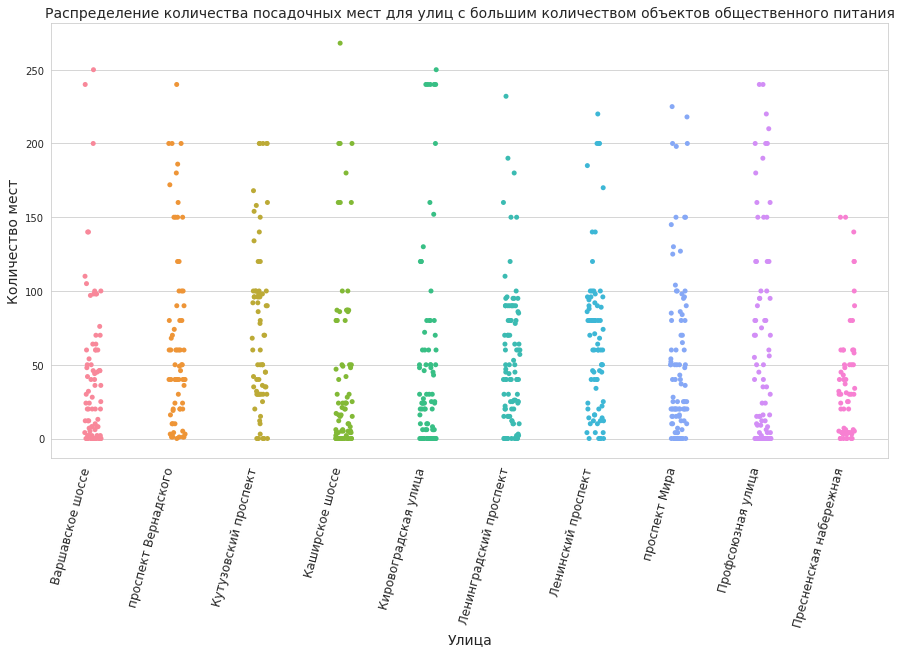

In [45]:
plt.figure(figsize=(15, 8))
ax = sns.stripplot(x="street", y="number", data=number_top_streets )
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания', fontsize=14)
plt.ylabel('Количество мест', fontsize=14)
plt.xlabel('Улица', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75
                  , horizontalalignment= 'right', fontsize= 12)
plt.show()

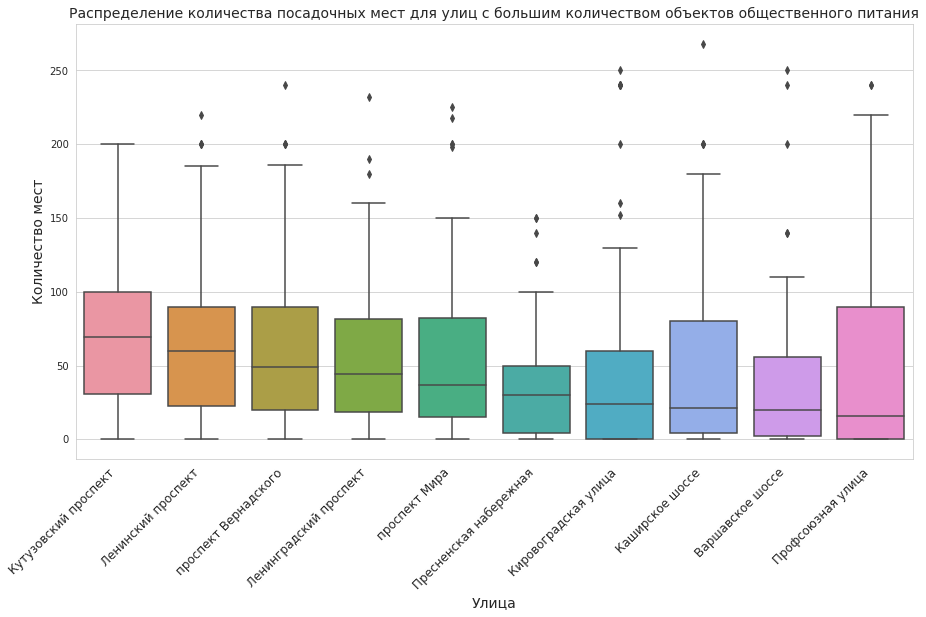

In [46]:
plt.figure(figsize=(15, 8))
my_order = number_top_streets.groupby('street')['number'].median().sort_values().iloc[::-1].index
ax = sns.boxplot(x="street", y="number", data=number_top_streets, order= my_order)
plt.title('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания', fontsize=14)
plt.ylabel('Количество мест', fontsize=14)
plt.xlabel('Улица', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45
                  , horizontalalignment= 'right', fontsize= 12)
plt.show()

In [47]:
subset_columns = ['mean', '50%', 'max']
number_top_streets.groupby('street')['number'].\
describe().reset_index().sort_values(by='50%', ascending=False).\
style.highlight_max(color='#6EBF8B', subset=subset_columns).highlight_min(color='#D885A3', subset=subset_columns)

,street,count,mean,std,min,25%,50%,75%,max
3,Кутузовский проспект,70.000000,75.657143,55.614065,0.000000,30.500000,69.000000,100.000000,200.000000
5,Ленинский проспект,78.000000,66.435897,51.649566,0.000000,22.500000,60.000000,90.000000,220.000000
8,проспект Вернадского,71.000000,65.577465,60.095320,0.000000,20.000000,49.000000,90.000000,240.000000
4,Ленинградский проспект,96.000000,53.322917,46.389993,0.000000,18.750000,44.500000,81.250000,232.000000
9,проспект Мира,91.000000,54.274725,54.990518,0.000000,15.000000,37.000000,82.000000,225.000000
6,Пресненская набережная,63.000000,37.015873,38.663767,0.000000,4.000000,30.000000,50.000000,150.000000
2,Кировоградская улица,86.000000,49.313953,67.269478,0.000000,0.000000,24.000000,60.000000,250.000000
1,Каширское шоссе,77.000000,45.402597,59.332307,0.000000,4.000000,21.000000,80.000000,268.000000
0,Варшавское шоссе,88.000000,38.840909,50.724608,0.000000,2.000000,20.000000,55.500000,250.000000
7,Профсоюзная улица,93.000000,53.881720,68.364091,0.000000,0.000000,16.000000,90.000000,240.000000


## Общий вывод

* Кафе является доминирующим видом среди объектов общественного питания в городе. Их доля составляет почти 40 процентов.
* Количесто не сетевых заведений общественного питания в 4 раза больше чем сетевых 
* Среди сетей также самым популярным видом является `кафе`. Таких заведений половина от общего чила.Педприятия быстрого обслуживания занимают вторую строчку в рейтенге. Далее следует рестораны.
* На рынке преобладает небольшие сетевые заведения с большим количеством мест
* В среднем самое большое количество мест наблюдается в столовых. Далее следуют рестораны  и бары. Буфеты находятся на 4 строчке.
* Больше всего объектов общественного питания находится на проспекте Мира, далее следует профсоюзная улица, тройку замыкает Лненинградский проспект. Соответственно районы в которые входят данные улицы яляются одними из самых насыщенных на рынке в сфере общепита.
* В основном на  юго-западе города находятся все регионы с большим количеством объектов общественного питания.
* В городе присутствует более 500 улиц на которых находится только один обект общественного питания.
* Районов в которых есть такие улицы в районе 90 процентов от всего города.
* По улицам с большим количеством объектов общественного питания можно сказать что в среднем среднее количество мест в этих заведениях примерно в районе 50. По всем районам наблюдается положительная скошенность по количеству мест. Так же можно заметить что примерно во всех районах есть определенные значения в которых есть определенная скученность объектов по количеству мест. Это значения в районе 50 и 100 мест.
